In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\thefl\Documents\infosys_internship_2024\projects\Medi alert\Data\raw\Healthcare Providers.csv")

In [3]:
billing_features = [
    'Number of Services',
    'Average Submitted Charge Amount',
    'Average Medicare Allowed Amount',
    'Average Medicare Payment Amount',
    'Number of Medicare Beneficiaries'
]

# Ensure these features are numerical and handle missing values
billing_data = data[billing_features].replace(',', '', regex=True).astype(float)
billing_data = billing_data.fillna(billing_data.median())  # Replace missing values with the median



In [4]:
billing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Number of Services                100000 non-null  float64
 1   Average Submitted Charge Amount   100000 non-null  float64
 2   Average Medicare Allowed Amount   100000 non-null  float64
 3   Average Medicare Payment Amount   100000 non-null  float64
 4   Number of Medicare Beneficiaries  100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [6]:
billing_data_scaled=scaler.fit_transform(billing_data)

In [7]:
from sklearn.ensemble import IsolationForest

In [8]:
iso_forest=IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

In [9]:
iso_forest.fit((billing_data_scaled))

IsolationForest(contamination=0.05, random_state=42)

In [10]:
billing_data['Anomaly']=iso_forest.predict(billing_data_scaled)

In [11]:
billing_data['Anomaly'] = billing_data['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Display summary of anomalies
anomaly_summary = billing_data['Anomaly'].value_counts()

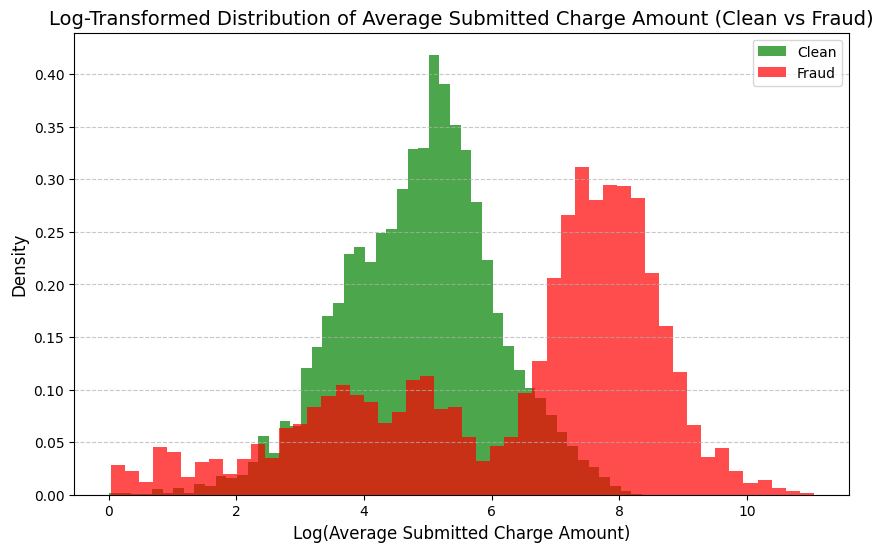

In [14]:
import numpy as np

# Apply log transformation to compress the feature range
feature_to_plot = 'Average Submitted Charge Amount'
billing_data['Log_' + feature_to_plot] = np.log1p(billing_data[feature_to_plot])

# Separate normal and anomaly data
anomaly_data = billing_data[billing_data['Anomaly'] == 'Anomaly']
normal_data = billing_data[billing_data['Anomaly'] == 'Normal']

# Plot the transformed histogram
plt.figure(figsize=(10, 6))
plt.hist(normal_data['Log_' + feature_to_plot], bins=50, color='green', alpha=0.7, label='Clean', density=True)
plt.hist(anomaly_data['Log_' + feature_to_plot], bins=50, color='red', alpha=0.7, label='Fraud', density=True)

# Add labels and title
plt.title(f'Log-Transformed Distribution of {feature_to_plot} (Clean vs Fraud)', fontsize=14)
plt.xlabel(f'Log({feature_to_plot})', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

# Use scaled data and model predictions
labels = billing_data['Anomaly'].map({'Anomaly': -1, 'Normal': 1}).values
silhouette = silhouette_score(billing_data_scaled, labels)
print(f"Silhouette Score: {silhouette}")


Silhouette Score: 0.821838191482157


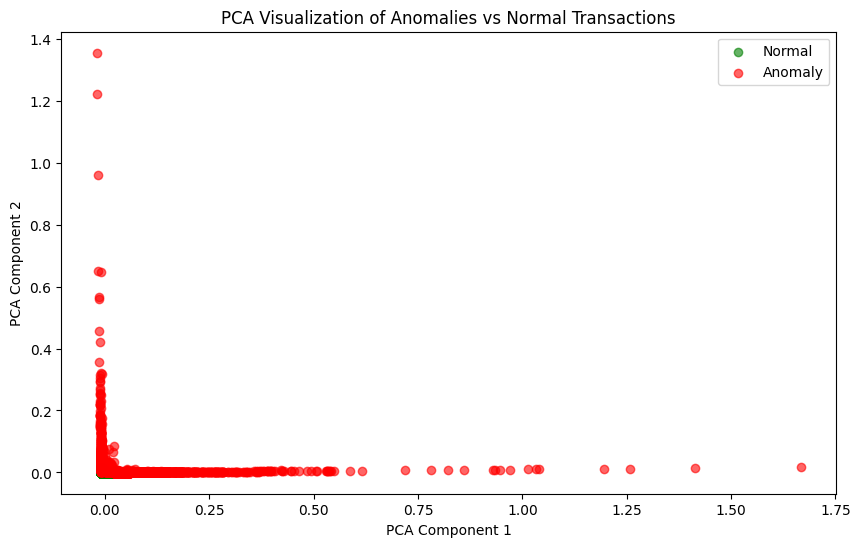

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(billing_data_scaled)

# Plot normal vs anomalies
plt.figure(figsize=(10, 6))
for anomaly_status, color, label in [('Normal', 'green', 'Normal'), ('Anomaly', 'red', 'Anomaly')]:
    subset = billing_data[billing_data['Anomaly'] == anomaly_status]
    plt.scatter(pca_data[subset.index, 0], pca_data[subset.index, 1], c=color, label=label, alpha=0.6)

plt.title('PCA Visualization of Anomalies vs Normal Transactions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Epoch 1/50


E:\Anaconda_Files_User\envs\ml\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 985us/step - loss: 0.0326 - val_loss: 1.5128e-04
Epoch 2/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - loss: 5.9928e-05 - val_loss: 1.0400e-04
Epoch 3/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - loss: 3.3883e-05 - val_loss: 5.7365e-05
Epoch 4/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 893us/step - loss: 1.4629e-05 - val_loss: 4.3586e-05
Epoch 5/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - loss: 8.5059e-06 - val_loss: 4.5015e-05
Epoch 6/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - loss: 5.2677e-06 - val_loss: 2.5534e-05
Epoch 7/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 943us/step - loss: 5.2710e-06 - val_loss: 2.6921e-05
Epoch 8/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - loss: 3.5938e-06 - val_loss: 1.1563e-05
Epoch 9/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - loss: 2.6523e-06 - val_loss: 6.3990e-06
Epoch 10/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - loss: 1.9439e-06 - val_loss: 5.8561e-06
Epoch 11/50
2813/2813 ━━━━━━━━━━━━

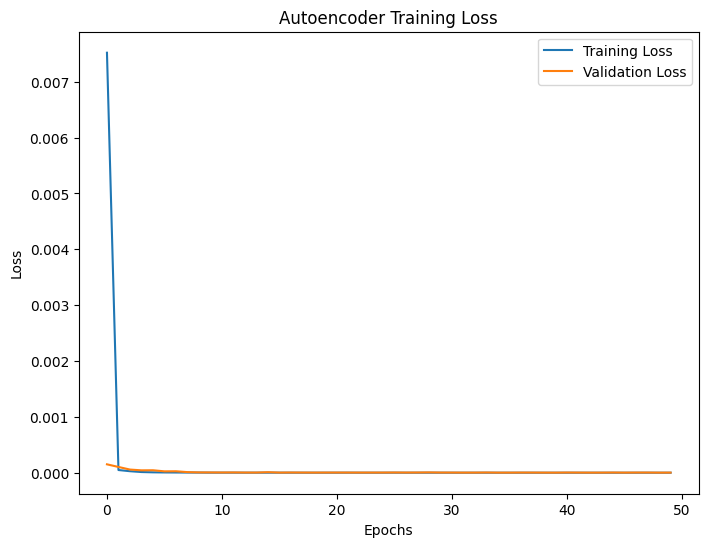

In [19]:
# Define the Autoencoder architecture
input_dim = billing_data_scaled.shape[1]  # Number of features
autoencoder = models.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),  # Corrected: shape must be a tuple
    layers.Dense(16, activation='relu'),  # Hidden layer 1
    layers.Dense(8, activation='relu'),   # Bottleneck layer
    layers.Dense(16, activation='relu'),  # Hidden layer 2
    layers.Dense(input_dim, activation='sigmoid')  # Output layer
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
history = autoencoder.fit(
    billing_data_scaled, billing_data_scaled,
    epochs=50, batch_size=32, validation_split=0.1, verbose=1
)

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


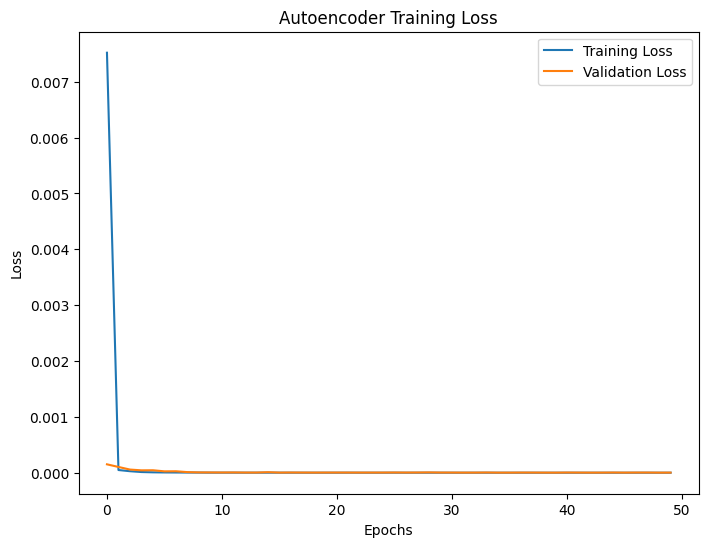

In [20]:
# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# Compute reconstruction errors
reconstructions = autoencoder.predict(billing_data_scaled)
reconstruction_errors = np.mean(np.square(billing_data_scaled - reconstructions), axis=1)

# Set a threshold for anomalies (e.g., 95th percentile of errors)
threshold = np.percentile(reconstruction_errors, 95)
billing_data['Reconstruction Error'] = reconstruction_errors
billing_data['Anomaly'] = billing_data['Reconstruction Error'].apply(lambda x: 'Anomaly' if x > threshold else 'Normal')

# Analyze the anomalies
anomaly_counts = billing_data['Anomaly'].value_counts()

# Display the results
# import ace_tools as tools; tools.display_dataframe_to_user(name="Autoencoder Anomaly Detection Results", dataframe=billing_data)
# print(f"Anomaly Counts:\n{anomaly_counts}")

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step


In [22]:
anomaly_counts = billing_data['Anomaly'].value_counts()

In [23]:
anomaly_counts

Anomaly
Normal     95000
Anomaly     5000
Name: count, dtype: int64